In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data() :
    csv_path = "/kaggle/input/assign-1/train.csv"
    return pd.read_csv(csv_path)

training_data = load_data()
training_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Task
0,2017-04-24,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,...,94.0,NaN,1024.1,1022.5,8.0,NaN,16.2,NaN,Yes,1.0
1,2013-10-11,Kota,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,...,52.0,21.0,1011.8,1006.6,2.0,4.0,30.1,39.2,No,0.0
2,2012-02-18,Vadodara,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,...,87.0,57.0,1018.2,1015.4,7.0,3.0,17.3,24.5,No,0.0
3,2012-02-18,Kanpur,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,...,79.0,67.0,1017.0,1016.5,6.0,NaN,23.0,25.4,No,0.0
4,2011-10-11,Srinagar,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,...,63.0,47.0,1018.6,1017.1,NaN,NaN,14.4,18.3,No,0.0


In [2]:
training_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Task
count,115190.00000,115370.000000,113764.000000,66039.000000,60426.000000,108166.000000,114960.000000,113911.000000,114251.000000,112752.000000,104307.000000,104326.000000,71611.000000,68820.000000,114963.000000,113471.000000,113761.000000
mean,12.19708,23.219542,2.378870,5.465219,7.612980,40.036056,14.052157,18.663492,68.908062,51.551041,1017.639292,1015.246449,4.451020,4.506117,16.991923,21.684229,0.223776
std,6.39974,7.117535,8.537384,4.195541,3.785258,13.631077,8.918674,8.819087,19.015417,20.784322,7.119666,7.052257,2.888848,2.722558,6.488468,6.937204,0.416776
min,-8.50000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.60000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.00000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.90000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000
max,31.90000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116368 entries, 0 to 116367
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           116368 non-null  object 
 1   Location       116368 non-null  object 
 2   MinTemp        115190 non-null  float64
 3   MaxTemp        115370 non-null  float64
 4   Rainfall       113764 non-null  float64
 5   Evaporation    66039 non-null   float64
 6   Sunshine       60426 non-null   float64
 7   WindGustDir    108118 non-null  object 
 8   WindGustSpeed  108166 non-null  float64
 9   WindDir9am     107939 non-null  object 
 10  WindDir3pm     112971 non-null  object 
 11  WindSpeed9am   114960 non-null  float64
 12  WindSpeed3pm   113911 non-null  float64
 13  Humidity9am    114251 non-null  float64
 14  Humidity3pm    112752 non-null  float64
 15  Pressure9am    104307 non-null  float64
 16  Pressure3pm    104326 non-null  float64
 17  Cloud9am       71611 non-null

In [4]:
null_value_percentages=(training_data.isna().sum()/training_data.shape[0])*100
null_value_percentages

Date              0.000000
Location          0.000000
MinTemp           1.012306
MaxTemp           0.857624
Rainfall          2.237729
Evaporation      43.249863
Sunshine         48.073353
WindGustDir       7.089578
WindGustSpeed     7.048329
WindDir9am        7.243400
WindDir3pm        2.919187
WindSpeed9am      1.209955
WindSpeed3pm      2.111405
Humidity9am       1.819229
Humidity3pm       3.107383
Pressure9am      10.364533
Pressure3pm      10.348206
Cloud9am         38.461605
Cloud3pm         40.860030
Temp9am           1.207377
Temp3pm           2.489516
RainToday         2.237729
Task              2.240307
dtype: float64

In [5]:
training_data['Rainfall'].describe()

count    113764.000000
mean          2.378870
std           8.537384
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [6]:
Day = [];
Month = [];
Year = [];
for i in training_data['Date']:
    date = i.split('-')
    Day.append(date[2])
    Month.append(date[1])
    Year.append(date[0])

training_data['Day'] = Day
training_data['Year'] = Year
training_data['Month'] = Month

In [7]:
training_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Task,Day,Year,Month
0,2017-04-24,Navi-Mumbai,14.5,17.8,14.2,NaN,NaN,NaN,NaN,NaN,...,1022.5,8.0,NaN,16.2,NaN,Yes,1.0,24,2017,04
1,2013-10-11,Kota,24.6,39.5,0.0,12.0,NaN,SE,31.0,N,...,1006.6,2.0,4.0,30.1,39.2,No,0.0,11,2013,10
2,2012-02-18,Vadodara,14.7,26.6,0.2,3.2,8.0,SSE,30.0,SW,...,1015.4,7.0,3.0,17.3,24.5,No,0.0,18,2012,02
3,2012-02-18,Kanpur,18.3,26.6,0.0,NaN,NaN,SE,28.0,WSW,...,1016.5,6.0,NaN,23.0,25.4,No,0.0,18,2012,02
4,2011-10-11,Srinagar,11.4,19.3,0.6,2.4,8.9,W,31.0,SW,...,1017.1,NaN,NaN,14.4,18.3,No,0.0,11,2011,10


In [8]:
def load_data() :
    csv_path2 = "/kaggle/input/assign-1/test.csv"
    return pd.read_csv(csv_path2)

test_data = load_data()
test_data.head()

Day = [];
Month = [];
Year = [];
for i in test_data['Date']:
    date = i.split('-')
    Day.append(date[2])
    Month.append(date[1])
    Year.append(date[0])

test_data['Day'] = Day
test_data['Year'] = Year
test_data['Month'] = Month

# training_data = strat_train_set.copy()
# test_data = strat_test_set.copy()
# data = training_data.copy()

test_data.head()

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Year,Month
0,100721,2012-04-22,Aurangabad,15.0,18.9,4.2,6.6,8.0,NNW,54.0,...,1005.2,1003.7,4.0,5.0,17.3,17.6,Yes,22,2012,04
1,30234,2008-03-30,Sydney,13.1,26.8,0.0,4.6,10.9,NaN,NaN,...,1013.0,1009.0,0.0,1.0,16.9,25.9,No,30,2008,03
2,28624,2013-03-27,Pune,18.1,32.2,0.0,2.1,NaN,NE,30.0,...,1019.2,1014.6,NaN,NaN,20.9,31.6,No,27,2013,03
3,31173,2010-10-25,Sydney,13.9,19.6,14.0,1.2,5.4,SSW,50.0,...,NaN,1018.4,7.0,6.0,15.5,19.1,Yes,25,2010,10
4,573,2010-06-27,Mumbai,0.6,11.9,0.2,NaN,NaN,W,22.0,...,1024.3,1021.8,1.0,2.0,2.8,11.5,No,27,2010,06


In [9]:
grouped = training_data.groupby(['Month'])
training_data['Evaporation']=grouped['Evaporation'].transform(lambda x: x.fillna(x.mean()))
training_data['Sunshine'] = grouped['Sunshine'].transform(lambda x: x.fillna(x.mean()))

In [10]:
# grouped = test_data.groupby(['Month'])
# for feature in test_data.columns:
#     test_data[feature] = grouped[feature].transform(lambda x: x.fillna(x.mode()))
# test_data['Sunshine'] = grouped['Sunshine'].transform(lambda x: x.fillna(x.mean()))

In [11]:
# corr_matrix = training_data.corr()
# corr_matrix["Task"].sort_values(ascending=False)

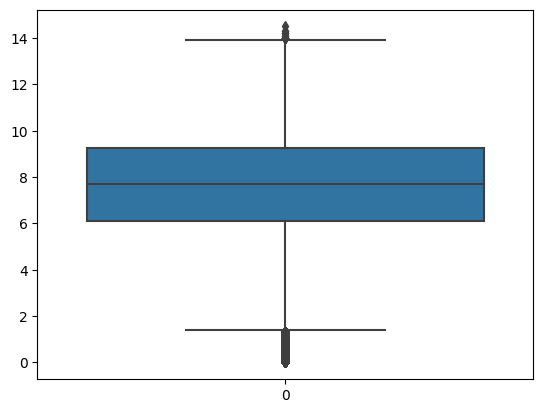

<Figure size 1000x1000 with 0 Axes>

In [12]:
f1 = 'WindSpeed9am'
f2='Evaporation'
f3 = 'Rainfall'
f4='MaxTemp'
f5='WindSpeed3pm'
f6='Humidity9am'
f7='Pressure9am'
f8='Temp3pm'
f9='WindSpeed9am'
f10='WindGustSpeed'
f11='Cloud9am'
f12='Cloud3pm'
f13='Pressure3pm'
f14='Humidity3pm'
f15='Temp9am'
f16='Sunshine'
sns.boxplot(training_data[f16])
plt.figure(figsize=(10, 10))
plt.show()

In [13]:
features=[f1,f2,f3,f5,f9,f10,f11,f12]
features2=[f4,f6,f7,f8,f13,f14,f15,f16]
# for i in features:
#     sns.boxplot(training_data[i])
#     plt.figure(figsize=(10, 10))
#     plt.show()

In [14]:
for i in features:
    IQR = training_data[i].quantile(0.75) - training_data[i].quantile(0.25)
    ha = training_data[i].quantile(0.75)+ 3*IQR
    la = training_data[i].quantile(0.25)- 3*IQR
    print('Heigth allowed=',ha)
    print('Lowest allowed=',la)
    print()
    df = training_data.copy()
    df[i] = np.where(df[i]>ha,ha, np.where(df[i]<la,la,training_data[i]))
    training_data = df.copy()


Heigth allowed= 55.0
Lowest allowed= -29.0

Heigth allowed= 20.02111546353292
Lowest allowed= -9.41583659764969

Heigth allowed= 3.2
Lowest allowed= -2.4000000000000004

Heigth allowed= 57.0
Lowest allowed= -20.0

Heigth allowed= 55.0
Lowest allowed= -29.0

Heigth allowed= 99.0
Lowest allowed= -20.0

Heigth allowed= 25.0
Lowest allowed= -17.0

Heigth allowed= 22.0
Lowest allowed= -13.0



In [15]:
for i in features2:
    IQR = training_data[i].quantile(0.75) - training_data[i].quantile(0.25)
    ha = training_data[i].quantile(0.75)+ 1.5*IQR
    la = training_data[i].quantile(0.25)- 1.5*IQR
    print('Heigth allowed=',ha)
    print('Lowest allowed=',la)
    print()
    df = training_data.copy()
    df[i] = np.where(df[i]>ha,ha, np.where(df[i]<la,la,training_data[i]))
    training_data = df.copy()

Heigth allowed= 43.65
Lowest allowed= 2.4499999999999975

Heigth allowed= 122.0
Lowest allowed= 18.0

Heigth allowed= 1036.65
Lowest allowed= 998.65

Heigth allowed= 41.099999999999994
Lowest allowed= 1.9000000000000057

Heigth allowed= 1034.4
Lowest allowed= 996.0

Heigth allowed= 109.5
Lowest allowed= -6.5

Heigth allowed= 35.550000000000004
Lowest allowed= -1.6500000000000004

Heigth allowed= 13.985123002334353
Lowest allowed= 1.3689261985993877



In [16]:
# for i in features:
#     sns.boxplot(training_data[i])
#     plt.figure(figsize=(10, 10))
#     plt.show()
# for i in features2:
#     sns.boxplot(training_data[i])
#     plt.figure(figsize=(10,10))
#     plt.show()

In [17]:
# from sklearn.impute import KNNImputer
# knn_imp = KNNImputer(n_neighbors=5)

# training_data = knn_imp.fit_transform(training_data)
# training_data = pd.DataFrame(training_data)
# test_data = knn_imp.fit_transform(test_data)
# test_data = pd.DataFrame(test_data)

In [18]:
print(training_data["Location"].unique())
print(training_data["WindGustDir"].unique())
print(training_data["WindDir3pm"].unique())
print(training_data["WindDir9am"].unique())
print(training_data["RainToday"].unique())
print(training_data["Date"].unique())

['Navi-Mumbai' 'Kota' 'Vadodara' 'Kanpur' 'Srinagar' 'Dhanbad' 'Mumbai'
 'Ludhiana' 'Jodhpur' 'Varanasi' 'Bangalore' 'Guwahati' 'Rajkot' 'Raipur'
 'Ghaziabad' 'Nasik' 'Kalyan-Dombivali' 'Sydney' 'Patna' 'Meerut'
 'Madurai' 'Amritsar' 'Bhopal' 'Visakhapatnam' 'Kolkata' 'Thane' 'Howrah'
 'Aurangabad' 'Jabalpur' 'Coimbatore' 'Lucknow' 'Chennai' 'Vijayawada'
 'Jaipur' 'Delhi' 'Pimpri-Chinchwad' 'Gwalior' 'Pune' 'Vasai-Virar'
 'Ahmedabad' 'Hyderabad' 'Indore' 'Faridabad' 'Allahabad' 'Surat' 'Ranchi'
 'Penrith' 'Agra' 'Nagpore']
[nan 'SE' 'SSE' 'W' 'N' 'ENE' 'NW' 'SSW' 'SW' 'ESE' 'S' 'NNW' 'NNE' 'E'
 'WSW' 'WNW' 'NE']
[nan 'NW' 'S' 'SSE' 'SSW' 'W' 'NNW' 'E' 'ESE' 'SW' 'ENE' 'NNE' 'N' 'WSW'
 'NE' 'WNW' 'SE']
[nan 'N' 'SW' 'WSW' 'SSW' 'ESE' 'NW' 'NNE' 'E' 'ENE' 'SSE' 'WNW' 'W' 'SE'
 'NNW' 'S' 'NE']
['Yes' 'No' nan]
['2017-04-24' '2013-10-11' '2012-02-18' ... '2007-12-03' '2007-11-17'
 '2008-01-01']


In [19]:
# from sklearn.preprocessing import OneHotEncoder
# training_data["Location"] = training_data["Location"].astype('category')
# training_data["WindGustDir"] = training_data["WindGustDir"].astype('category')
# training_data["WindDir3pm"] = training_data["WindDir3pm"].astype('category')
# training_data["WindDir9am"] = training_data["WindDir9am"].astype('category')
# training_data["RainToday"] = training_data["RainToday"].astype('category')

# training_data["Location_new"] = training_data["Location"].cat.codes
# training_data["WindGustDir_new"] = training_data["WindGustDir"].cat.codes
# training_data["WindDir3pm_new"] = training_data["WindDir3pm"].cat.codes
# training_data["WindDir9am_new"] = training_data["WindDir9am"].cat.codes
# training_data["RainToday_new"] = training_data["RainToday"].cat.codes

# enc = OneHotEncoder()
# enc_training_data = pd.DataFrame(enc.fit_transform(training_data[["Location_new", "WindGustDir_new", "WindDir3pm_new", "WindDir9am_new", "RainToday_new"]]))

# training_data = training_data.join(enc_training_data)
# # new_data = new_data.drop(["0"], axis=1)
# training_data.head()

In [20]:
# test_data["Location"] = test_data["Location"].astype('category')
# test_data["WindGustDir"] = test_data["WindGustDir"].astype('category')
# test_data["WindDir3pm"] = test_data["WindDir3pm"].astype('category')
# test_data["WindDir9am"] = test_data["WindDir9am"].astype('category')
# test_data["RainToday"] = test_data["RainToday"].astype('category')

# test_data["Location_new"] = test_data["Location"].cat.codes
# test_data["WindGustDir_new"] = test_data["WindGustDir"].cat.codes
# test_data["WindDir3pm_new"] = test_data["WindDir3pm"].cat.codes
# test_data["WindDir9am_new"] = test_data["WindDir9am"].cat.codes
# test_data["RainToday_new"] = test_data["RainToday"].cat.codes

# enc2 = OneHotEncoder()
# enc_test_data = pd.DataFrame(enc2.fit_transform(test_data[["Location_new", "WindGustDir_new", "WindDir3pm_new", "WindDir9am_new", "RainToday_new"]]))

# test_data = test_data.join(enc_test_data)
# # new_data = new_data.drop(["0"], axis=1)
# test_data.head()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
c1='WindGustDir'
c2='WindDir3pm'
c3='WindDir9am'
c4='RainToday'
c5='Location'
encoder = LabelEncoder()
categorical_features = [c1,c2,c3,c4,c5]
for each in categorical_features:
    training_data[each] = encoder.fit_transform(training_data[each])
    
test_cat_features = [c1,c2,c3,c4,c5]
for col in test_cat_features:
    test_data[col] = encoder.fit_transform(test_data[col])

In [22]:
training_data.dropna(subset='Task',inplace=True)
training_data['Task'].astype(int)

0         1
1         0
2         0
3         0
4         0
         ..
116363    0
116364    0
116365    0
116366    0
116367    0
Name: Task, Length: 113761, dtype: int64

In [23]:
# train_features = training_data.drop(["Task", "Date"], axis=1)
# training_data.dropna(subset=["Task"], inplace=True)
# training_data.dropna()
train_labels = training_data[["Task"]]
test_features = test_data.drop(["ID", "Date"], axis=1)
train_features = training_data.drop(["Task","Date"], axis=1)


# scaler = StandardScaler()
# train_features = scaler.fit_transform(train_features)
# test_features = scaler.transform(test_features)
# train_features = training_features.select_dtypes(include=["float64", "int8"])
# train_features = training_features.select_dtypes(include=["float64"])
# train_features = pd.DataFrame(train_features)
# train_features = train_features.drop([f2,f7,f13,f16], axis=1)
# WindSpeed9am     0.092881
# WindSpeed3pm     0.088897
# MinTemp          0.082351
# Temp9am         -0.026643
# Evaporation     -0.120708
# MaxTemp         -0.160697
# Temp3pm         -0.193153
# training_data = training_data.dropna()



# test_features = test_data.select_dtypes(include=["float64", "int8"])
# test_features = test_data.select_dtypes(include=["float64"])
# test_features = pd.DataFrame(test_features)
# test_features = test_features.drop([f2,f7,f13,f16], axis=1)

# from sklearn.impute import KNNImputer
# knn_imp = KNNImputer(n_neighbors=3)
# train_features = knn_imp.fit_transform(train_features)
# train_features = pd.DataFrame(train_features)

# train_labels = knn_imp.fit_transform(train_labels)
# train_labels = pd.DataFrame(train_labels)

# test_features = knn_imp.fit_transform(test_features)
# test_features = pd.DataFrame(test_features)
# train_features.head()


from sklearn.impute import SimpleImputer
impt = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impt = IterativeImputer(max_iter=1000, random_state=42)

train_features = impt.fit_transform(train_features)
train_features = pd.DataFrame(train_features)

# # train_labels
train_labels = impt.fit_transform(train_labels)
train_labels = pd.DataFrame(train_labels)
# print(train_labels[train_labels[["Task"]] > 0].count())


test_features = impt.fit_transform(test_features)
test_features = pd.DataFrame(test_features)
# for i in features: 
#     test_features[i] = test_features[i].interpolate(method="spline",order = 2, limit_direction="forward")
#     train_features[i] = train_features[i].interpolate(method="spline",order = 2, limit_direction="forward")
# #     train_labels[i] = train_labels[i].interpolate(method="linear", limit_direction="both")

# for i in features2: 
#     test_features[i] = test_features[i].interpolate(method="spline",order = 2, limit_direction="forward")
#     train_features[i] = train_features[i].interpolate(method="spline", order = 2,limit_direction="forward")
#     train_labels[i] = train_labels[i].interpolate(method="linear", limit_direction="both")
# train_features.head()

# print(train_features.shape)
# print(test_features.shape)
# print(train_labels.shape)

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

train_features, train_labels = smote.fit_resample(train_features, train_labels)
# train_features, train_labels = smote.fit_sample(train_features, train_labels.ravel())
print(train_features.shape, train_labels.shape)

(176608, 24) (176608, 1)


In [25]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,32.0,14.5,17.8,3.2,4.539162,7.063376,16.0,25.542494,16.0,16.0,...,1024.1,1022.5,8.000000,5.939416,16.2,16.7363,1.0,24.0,2017.0,4.0
1,24.0,24.6,39.5,0.0,12.000000,8.475821,9.0,31.000000,3.0,7.0,...,1011.8,1006.6,2.000000,4.000000,30.1,39.2000,0.0,11.0,2013.0,10.0
2,44.0,14.7,26.6,0.2,3.200000,8.000000,10.0,30.000000,12.0,8.0,...,1018.2,1015.4,7.000000,3.000000,17.3,24.5000,0.0,18.0,2012.0,2.0
3,22.0,18.3,26.6,0.0,7.588473,8.548233,9.0,28.000000,15.0,10.0,...,1017.0,1016.5,6.000000,4.761255,23.0,25.4000,0.0,18.0,2012.0,2.0
4,40.0,11.4,19.3,0.6,2.400000,8.900000,13.0,31.000000,12.0,11.0,...,1018.6,1017.1,4.031179,3.376148,14.4,18.3000,0.0,11.0,2011.0,10.0


In [26]:
test_features.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.0,15.0,18.9,4.2,6.600000,8.000000,6.0,54.00000,6.0,7.0,...,1005.20000,1003.7,4.000000,5.000000,17.3,17.6,1.0,22.0,2012.0,4.0
1,42.0,13.1,26.8,0.0,4.600000,10.900000,16.0,43.71945,13.0,14.0,...,1013.00000,1009.0,0.000000,1.000000,16.9,25.9,0.0,30.0,2008.0,3.0
2,36.0,18.1,32.2,0.0,2.100000,8.794686,4.0,30.00000,16.0,4.0,...,1019.20000,1014.6,4.687826,3.369251,20.9,31.6,0.0,27.0,2013.0,3.0
3,42.0,13.9,19.6,14.0,1.200000,5.400000,11.0,50.00000,12.0,8.0,...,1019.61873,1018.4,7.000000,6.000000,15.5,19.1,1.0,25.0,2010.0,10.0
4,29.0,0.6,11.9,0.2,-0.527789,8.881986,13.0,22.00000,12.0,7.0,...,1024.30000,1021.8,1.000000,2.000000,2.8,11.5,0.0,27.0,2010.0,6.0


In [27]:
from sklearn import svm
Nu_clf = svm.NuSVC(kernel="poly",gamma="auto")
Norm_clf = svm.SVC()

# # Hypertuning for NuSVC
# svc = NuSVC(kernel='rbf', nu=0.5, gamma='scale', 
#             degree=3, coef0=0.0, shrinking=True, 
#             probability=False, tol=1e-3, cache_size=200, 
#             class_weight=None, verbose=False, max_iter=-1, 
#             decision_function_shape='ovr', break_ties=False, random_state=None)

# # Hypertuning for SVC
# svc = SVC(C=1.0, kernel='rbf', degree=3, 
#           gamma='scale', coef0=0.0, shrinking=True, 
#           probability=False, tol=1e-3, cache_size=200, 
#           class_weight=None, verbose=False, max_iter=-1, 
#           decision_function_shape='ovr', break_ties=False, random_state=None)

svm_model = clf.fit(train_features, train_labels)
clf_pred = svm_model.predict(test_features)

In [28]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier()

# gbc_model = gbc.fit(train_features, train_labels)
# gbc_pred = gbc_model.predict(test_features)

In [29]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(max_iter=10000)

# log_reg_model = log_reg.fit(train_features, train_labels)
# log_reg_pred = log_reg_model.predict(test_features)

In [30]:
# from sklearn.linear_model import SGDClassifier
# sgdc = SGDClassifier()

# sgdc_model = sgdc.fit(train_features, train_labels)
# sgdc_pred = sgdc_model.predict(test_features)

In [31]:
# import xgboost as xgb
# xgb_model = xgb.XGBClassifier(
#     n_estimators = 500,
#     max_depth = 5,
#     learning_rate = 0.05,
#     gamma = 0,
#     reg_lambda = 1
# )

# xgb_model.fit(train_features, train_labels)
# xgb_pred = xgb_model.predict(test_features)

In [32]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 2), random_state=1)
# clf.fit(train_features, train_labels)
# clf_pred= clf.predict(test_features)

In [33]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()

# dt_model = dt.fit(train_features, train_labels)
# dt_pred = dt_model.predict(test_features)

In [58]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=600, num_leaves = 80, learning_rate = 0.2, max_depth = 50)
lgb_model = clf.fit(train_features, train_labels)
lgb_pred = lgb_model.predict(test_features)
# LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.1, max_depth=-1,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [59]:
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_features, train_labels)
lgb_model.fit(train_X, train_y)
pred_y = lgb_model.predict(val_X)
# scm_model.fit(train_X, train_y)
# pred_y = scm_model.predict(val_X)
# rf_model.fit(train_X,train_y)
# pred_y = rf_model.predict(val_X)
accuracy = metrics.accuracy_score(val_y, pred_y)
print("Accuracy: ", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy:  0.9113063960862475


In [60]:
# writing predictions to submission.csv
def load_data() :
    csv_path3 = "/kaggle/input/assign-1/sample_submission.csv"
    return pd.read_csv(csv_path3)

fin = load_data()
fin["Task"] = lgb_pred
fin.head()

,ID,Task
0,100721,1.0
1,30234,0.0
2,28624,0.0
3,31173,1.0
4,573,0.0


In [61]:
fin.to_csv('./sample_submission7.csv', encoding='utf-8', index=False)